In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\New folder\OneDrive\Desktop\email_spam_detector\emails.csv")

In [4]:
df.sample(5)

,text,spam
2847,Subject: re : confirmation of your order yes ...,0
336,Subject: become happy with your performance m...,1
3935,Subject: my resume vince : attached please f...,0
242,"Subject: logo , stationer , website design and...",1
5073,"Subject: re : grades pam , another group : ...",0


In [5]:
df.columns = ["content", "target"]

In [6]:
df.iloc[176].content

'Subject: 10 million fresh email addresses sent to you on cd for free ! ! ! try before you buy ! !  get ready for a deal you \' ve never seen before !  10 million hot fresh email addresses and much more !  try before you buy ! ! ! ! !  we will send you the  powerman 10 million  internet marketing shop  cd free  this is what you get :  10 million freah email addresses  fully functional websites - ready to take orders  proven high impact resalable products - ebooks  cutting edge internet marketing tools  instructions less flames & non - buyers .  * less contact with anti - commerce radicals & extremists .  remember that potential income chart at the beginning of this message ? can you imagine the kind of money you could  make if you mailed one million pieces and sold only one tenth ( . 01 % ) of one percent ? you do the math , you \' ll be amazed !  this product will prove to be the best of it \' s kind compared to any cd in terms of hours and money spent bringing it to  market . no comp

In [7]:
df.isnull().sum()

content    0
target     0
dtype: int64

In [8]:
df.duplicated().sum()

33

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5695, 2)

In [12]:
df.value_counts('target')

target
0    4327
1    1368
Name: count, dtype: int64

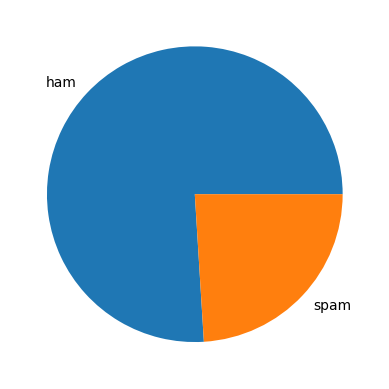

In [13]:
import matplotlib.pyplot as plt 

plt.pie(df.value_counts('target'), labels = ['ham', 'spam'] )
plt.show()

In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kevin/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [15]:
df = df.copy()

In [16]:
df.head()

,content,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [17]:
df['len_email'] = df['content'].apply(len)

In [18]:
df['len_words'] = df['content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df['len_sent'] = df['content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df

,content,target,len_email,len_words,len_sent
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9
...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30
5726,"Subject: re : interest david , please , call...",0,1060,277,6


In [21]:
df[df['target']==1][['len_email','len_words','len_sent']].describe()

,len_email,len_words,len_sent
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [22]:
df[df['target']==0][['len_email','len_words','len_sent']].describe()

,len_email,len_words,len_sent
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


<Axes: xlabel='len_email', ylabel='Count'>

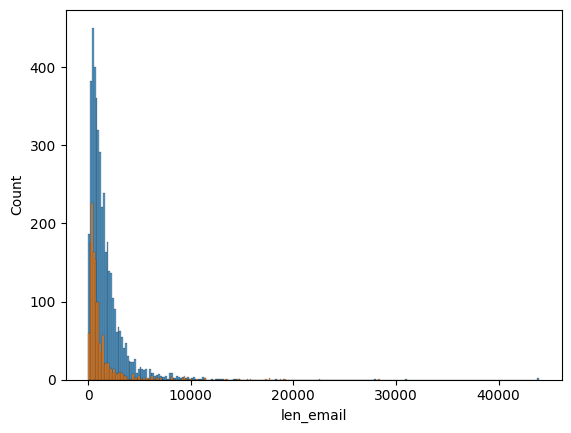

In [23]:
import seaborn as sns

sns.histplot(df[df['target']==0]['len_email'])
sns.histplot(df[df['target']==1]['len_email'])

In [24]:
num_df = df[['target','len_email','len_words','len_sent']].corr()

<Axes: >

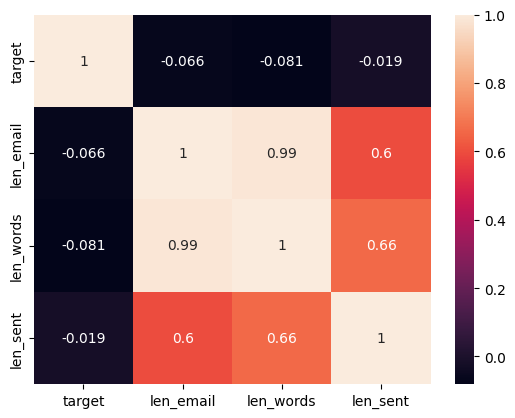

In [25]:
sns.heatmap(num_df, annot=True)

In [26]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stop_words = list(stopwords.words('english'))

def text_transform(text):
    text = text.lower()
    tokenised_word = word_tokenize(text)
    rest_words = ['subject', 'e', 'mail', 'n']
    tokenised_word = [word for word in tokenised_word if word not in rest_words]

    y=[]

    for i in tokenised_word:
        if i.isalnum():
            y.append(i)

    z = []

    for i in y:
        if i not in stop_words and i not in string.punctuation:
            z.append(i)
    Output = []
    for i in z:
        Output.append(ps.stem(i))
    return " ".join(Output)

In [27]:
text_transform(' e mail subject subject HEY , how are you? can you tell me about ML lecture which was streamed by CampusX')

'hey tell ml lectur stream campusx'

In [28]:
df['preprocessed_text'] = df['content'].apply(text_transform)

In [29]:
df.head()

,content,target,len_email,len_words,len_sent,preprocessed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,1,500,99,5,4 color print special request addit inform cli...
4,"Subject: do not have money , get software cds ...",1,235,53,9,money get softwar cd softwar compat great grow...


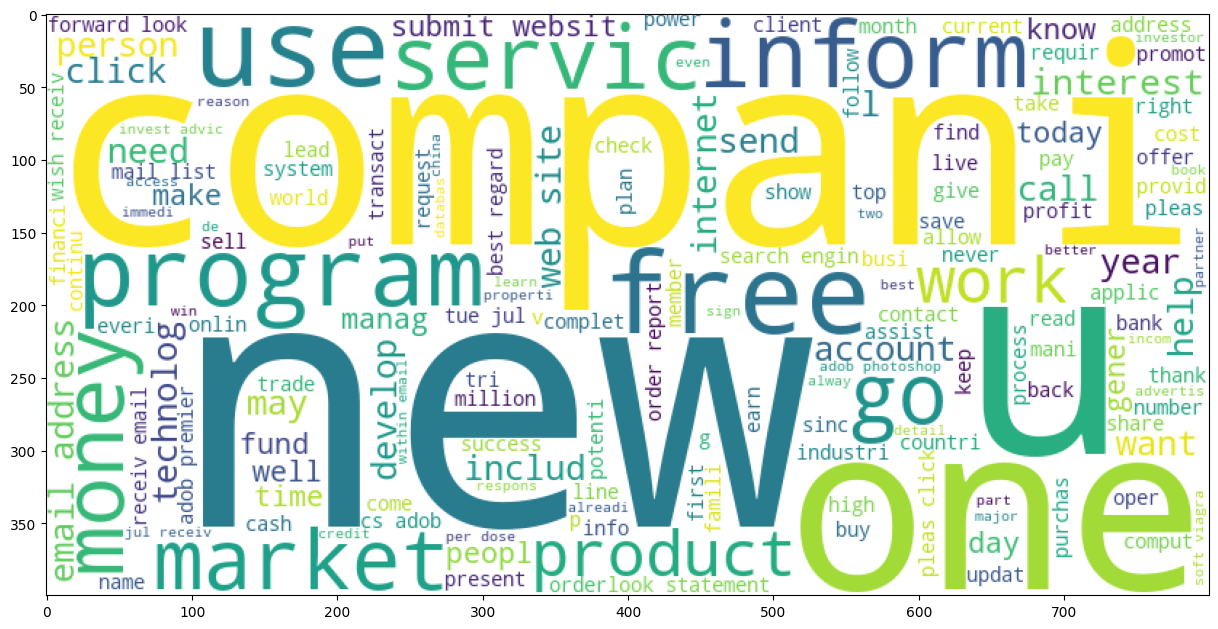

In [30]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white')

spam_wc = wc.generate(df[df['target']==1]['preprocessed_text'].str.cat(sep=" "))



plt.figure(figsize= (15,10))
plt.imshow(spam_wc)

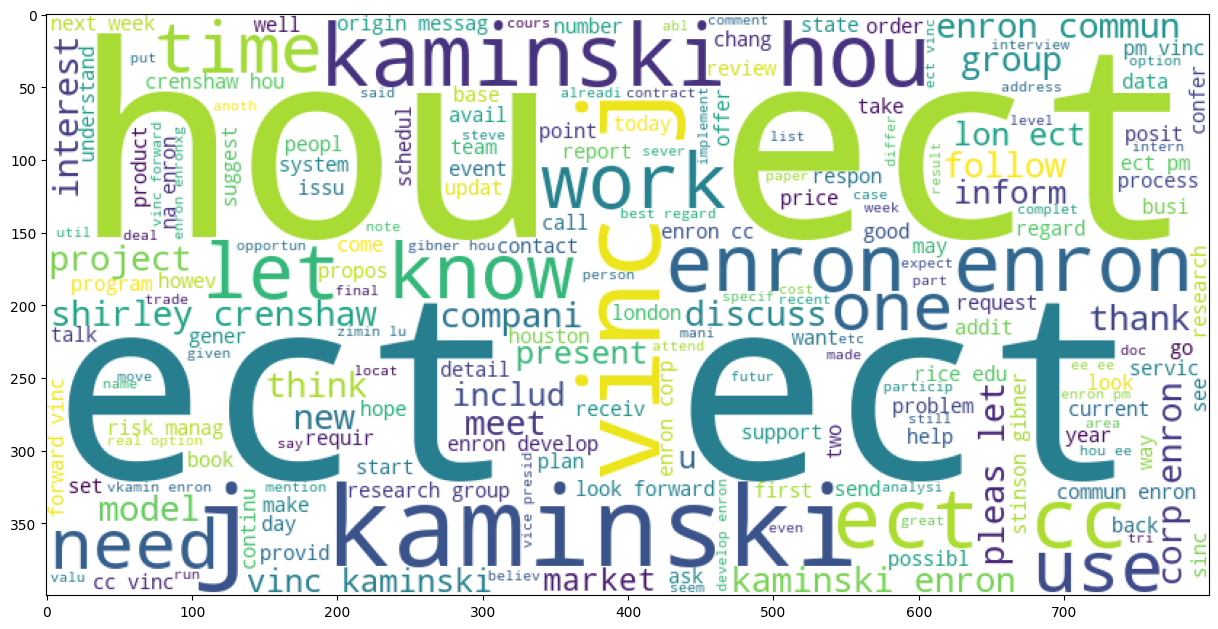

In [31]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white')

ham_wc = wc.generate(df[df['target']==0]['preprocessed_text'].str.cat(sep=" "))



plt.figure(figsize= (15,10))
plt.imshow(ham_wc)

In [32]:
spam_corpus = [word for msg in df[df['target']==1]['preprocessed_text'].tolist() for word in msg.split()]
len(spam_corpus)

171666

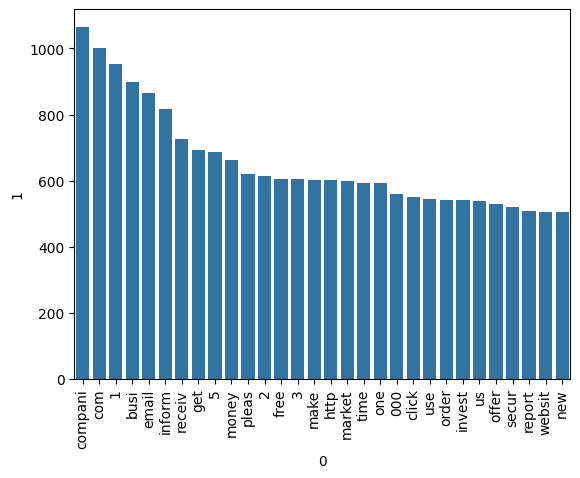

In [33]:
from collections import Counter
spam_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x =spam_words_df[0],y=spam_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

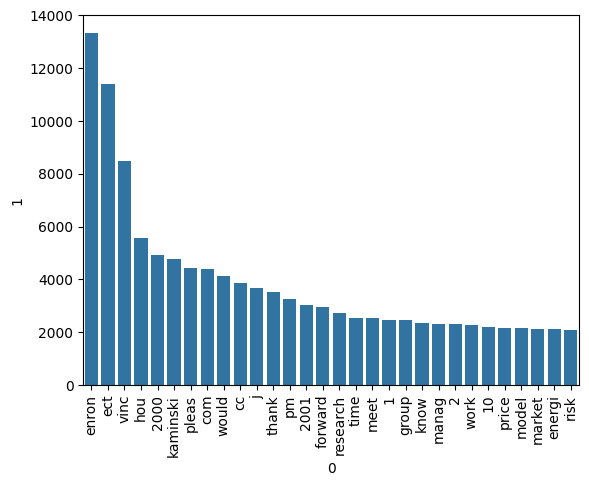

In [34]:
ham_corpus = [word for msg in df[df['target']==0]['preprocessed_text'].tolist() for word in msg.split()]
ham_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_words_df[0],y=ham_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(max_features=3000)

In [36]:
x = cv.fit_transform(df['preprocessed_text']).toarray()

In [37]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
y= df['target']

In [39]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: target, Length: 5695, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split


x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

G = GaussianNB()
M =MultinomialNB()
B = BernoulliNB()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

G.fit(x_train, y_train)
y_pred1 = G.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9455662862159789
[[810  33]
 [ 29 267]]
0.89


In [43]:
M.fit(x_train, y_train)
y_pred2 = M.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9833187006145742
[[830  13]
 [  6 290]]
0.9570957095709571


In [44]:
B.fit(x_train, y_train)
y_pred3 = B.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9411764705882353
[[776  67]
 [  0 296]]
0.8154269972451791


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

x = tf.fit_transform(df['preprocessed_text']).toarray()

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

G1 = GaussianNB()
M1 =MultinomialNB()
B1 = BernoulliNB()

G1.fit(x_train, y_train)
y_pred_idf_1 = G.predict(x_test)
print(accuracy_score(y_test,y_pred_idf_1))
print(confusion_matrix(y_test,y_pred_idf_1))
print(precision_score(y_test,y_pred_idf_1))

M1.fit(x_train, y_train)
y_pred_idf_2 = M1.predict(x_test)
print(accuracy_score(y_test,y_pred_idf_2))
print(confusion_matrix(y_test,y_pred_idf_2))
print(precision_score(y_test,y_pred_idf_2))

B1.fit(x_train, y_train)
y_pred_idf_3 = B1.predict(x_test)
print(accuracy_score(y_test,y_pred_idf_3))
print(confusion_matrix(y_test,y_pred_idf_3))
print(precision_score(y_test,y_pred_idf_3))

0.9411764705882353
[[805  38]
 [ 29 267]]
0.8754098360655738
0.9806848112379281
[[839   4]
 [ 18 278]]
0.9858156028368794
0.9411764705882353
[[776  67]
 [  0 296]]
0.8154269972451791


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [49]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [50]:
def try_clf(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    return accuracy_score(y_test,y_pred), precision_score(y_test,y_pred)

In [51]:
accuracy = []
precision = []

for name , clf in clfs.items():
    acc , prec = try_clf(clf, x_train,y_train, x_test,y_test)
    accuracy.append(acc)
    precision.append(prec)
    

In [52]:
pd.DataFrame({'algorithm': clfs.keys(), 'accuracy':accuracy, 'precision':precision}).sort_values('precision', ascending=False)

,algorithm,accuracy,precision
0,SVC,0.992098,0.993127
5,RF,0.985075,0.992933
8,ETC,0.978051,0.992727
2,NB,0.980685,0.985816
9,GBDT,0.957858,0.973282
1,KN,0.976295,0.968641
10,xgb,0.985075,0.963455
4,LR,0.975417,0.962069
7,BgC,0.966637,0.932886
6,AdaBoost,0.948200,0.878594


In [54]:
import pickle  
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(svc, open('model.pkl','wb'))